In [25]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd 
import math
from sklearn import metrics
import seaborn as sns 

In [23]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/"My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [6]:
col_names=['s1','c1','s2','c2','s3','c3','s4','c4','s5','c5','classes' ]
dataset = pd.read_csv("poker-hand-training-true.data",names=col_names)
dataset_test = pd.read_csv("poker-hand-testing.data",names=col_names)
print(dataset)
print(dataset_test)

       s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0       1  10   1  11   1  13   1  12   1   1        9
1       2  11   2  13   2  10   2  12   2   1        9
2       3  12   3  11   3  13   3  10   3   1        9
3       4  10   4  11   4   1   4  13   4  12        9
4       4   1   4  13   4  12   4  11   4  10        9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
25005   3   9   2   6   4  11   4  12   2   4        0
25006   4   1   4  10   3  13   3   4   1  10        1
25007   2   1   2  10   4   4   4   1   4  13        1
25008   2  12   4   3   1  10   1  12   4   9        1
25009   1   7   3  11   3   3   4   8   3   7        1

[25010 rows x 11 columns]
        s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0        1   1   1  13   2   4   2   3   1  12        0
1        3  12   3   2   3  11   4   5   2   5        1
2        1   9   4   6   1   4   3   2   3   9        1
3        1   4   3  13   2  13   2   1   3   6        1
4        3  10   2   7   1   2   

In [7]:
dataset.shape
dataset_test.shape

(1000000, 11)

In [8]:
training_dataset = dataset.values[:,0:10]
training_dataset
training_dataset.shape

(25010, 10)

In [9]:
training_class_dataset = dataset.values[:,-1]
training_class_dataset
training_class_dataset.shape

(25010,)

Text(0.5, 1.0, 'Correlation Heatmap of Featrues')

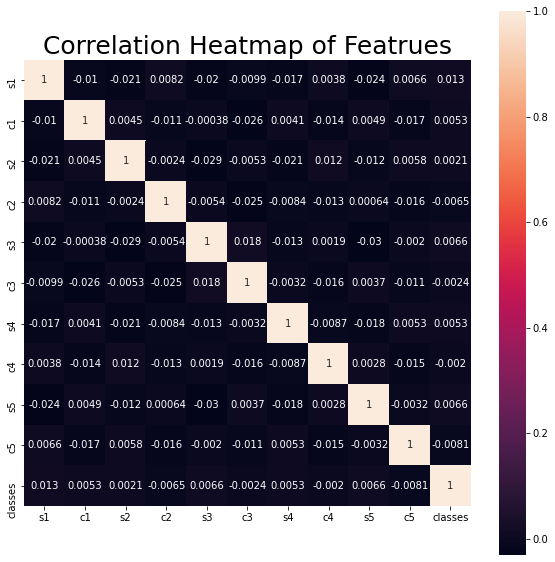

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,square=True)
plt.title('Correlation Heatmap of Featrues',size=25)

In [10]:
def euclidiean_distance(row1,row2):     
    distance = 0.0  
    for i in range(len(row1)):
        distance+=(row1[i]-row2[i])**2
    
    return math.sqrt(distance)

In [11]:
unique_list = []
for x in training_class_dataset:
    if x not in unique_list:
        unique_list.append(x)
print(unique_list)

#to replcae the class with  numerical value
for i in range(len(training_class_dataset)):
    for k in range(len(unique_list)):
        if(training_class_dataset[i]==unique_list[k]):
            training_class_dataset[i]=k
            break
print(training_class_dataset)

[9, 8, 1, 0, 4, 3, 2, 5, 6, 7]
[0 0 0 ... 2 2 2]


In [14]:
distance = []
for i in range(len(training_dataset)):
    distance.append([euclidiean_distance(training_dataset[i],training_dataset[52]),training_class_dataset[i]])
print(distance)
print(len(distance))

[[13.601470508735444, 0], [13.784048752090222, 0], [13.74772708486752, 0], [17.08800749063506, 0], [14.071247279470288, 0], [9.591663046625438, 1], [17.233687939614086, 1], [8.48528137423857, 1], [8.54400374531753, 1], [9.16515138991168, 1], [7.0, 2], [12.649110640673518, 3], [15.165750888103101, 3], [16.24807680927192, 3], [12.609520212918492, 2], [14.38749456993816, 3], [8.306623862918075, 4], [10.816653826391969, 3], [16.24807680927192, 3], [8.12403840463596, 2], [17.26267650163207, 2], [11.313708498984761, 3], [14.45683229480096, 2], [9.746794344808963, 2], [16.97056274847714, 2], [11.874342087037917, 2], [5.291502622129181, 2], [8.831760866327848, 2], [10.488088481701515, 3], [13.19090595827292, 3], [15.874507866387544, 5], [11.575836902790225, 3], [12.68857754044952, 3], [9.327379053088816, 3], [12.12435565298214, 3], [9.219544457292887, 3], [10.246950765959598, 2], [13.228756555322953, 2], [10.908712114635714, 3], [18.973665961010276, 2], [12.489995996796797, 2], [10.86278049120

In [16]:
distance.sort()
distance

[[0.0, 3],
 [2.8284271247461903, 2],
 [3.0, 2],
 [3.0, 3],
 [3.0, 3],
 [3.1622776601683795, 2],
 [3.1622776601683795, 3],
 [3.1622776601683795, 3],
 [3.1622776601683795, 6],
 [3.3166247903554, 2],
 [3.3166247903554, 2],
 [3.3166247903554, 3],
 [3.4641016151377544, 2],
 [3.4641016151377544, 2],
 [3.4641016151377544, 3],
 [3.605551275463989, 3],
 [3.605551275463989, 3],
 [3.605551275463989, 3],
 [3.605551275463989, 6],
 [3.7416573867739413, 2],
 [3.7416573867739413, 3],
 [3.7416573867739413, 3],
 [3.7416573867739413, 6],
 [3.872983346207417, 2],
 [3.872983346207417, 2],
 [3.872983346207417, 2],
 [3.872983346207417, 3],
 [3.872983346207417, 3],
 [3.872983346207417, 3],
 [3.872983346207417, 3],
 [4.0, 3],
 [4.0, 3],
 [4.0, 3],
 [4.0, 6],
 [4.0, 6],
 [4.123105625617661, 2],
 [4.123105625617661, 2],
 [4.123105625617661, 2],
 [4.123105625617661, 3],
 [4.123105625617661, 3],
 [4.123105625617661, 3],
 [4.123105625617661, 3],
 [4.123105625617661, 3],
 [4.123105625617661, 3],
 [4.123105625617661,

In [20]:
nearest_neighbour = 7
identify = [0 for i in range(len(unique_list))]
for i in range(nearest_neighbour):
    identify[distance[i][1]]+=1
print(identify)
unique_list
print("Predicted class: ",unique_list[identify.index(max(identify))])

[0, 0, 3, 4, 0, 0, 0, 0, 0, 0]
Predicted class:  0


In [21]:
nearest_neighbour = 5
identify = [0 for i in range(len(unique_list))]
for i in range(nearest_neighbour):
    identify[distance[i][1]]+=1
print(identify)
unique_list
print("Predicted class: ",unique_list[identify.index(max(identify))])

[0, 0, 2, 3, 0, 0, 0, 0, 0, 0]
Predicted class:  0


In [22]:
nearest_neighbour = 3
identify = [0 for i in range(len(unique_list))]
for i in range(nearest_neighbour):
    identify[distance[i][1]]+=1
print(identify)
unique_list
print("Predicted class: ",unique_list[identify.index(max(identify))])

[0, 0, 2, 1, 0, 0, 0, 0, 0, 0]
Predicted class:  1
